In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
%matplotlib inline
%config InlineBackend.figure_format='retina'
import cmocean
import cartopy.crs as ccrs
import matplotlib.path as mpath
import nc_time_axis
import pandas as pd
import matplotlib as mpl
import momlevel as ml
import gcsfs
import zarr
from matplotlib.ticker import FormatStrFormatter

In [2]:
mask_CM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/CM4_mask_antarctica.nc')
mask_ESM4= xr.open_dataset('/home/pachamama/shared/antarctica_mask/ESM4_mask_antarctica.nc')
mask_ERA5= xr.open_dataset('/home/pachamama/shared/antarctica_mask/ERA5_mask_antarctica.nc')

In [3]:
mask_ERA5


<xarray.Dataset>
Dimensions:         (longitude: 720, latitude: 361)
Coordinates:
  * longitude       (longitude) float32 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
  * latitude        (latitude) float32 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
    number          int32 ...
    time            datetime64[ns] ...
Data variables:
    orog            (latitude, longitude) float32 ...
    ross_ERA5       (latitude, longitude) float32 ...
    filchner_ERA5   (latitude, longitude) float32 ...
    peninsula_ERA5  (latitude, longitude) float32 ...
    loweast_ERA5    (latitude, longitude) float32 ...
    lowwest_ERA5    (latitude, longitude) float32 ...
    plateau_ERA5    (latitude, longitude) float32 ...

In [4]:
temperature_pi_ESM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_esm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)

temperature_pi_CM4 = xr.open_mfdataset("/backup/tuq41374/model_output/cmip6/piControl/gfdl_cm4/atmos/monthly/temp/*.nc", 
                          chunks={'time':1,'z_l':1},drop_variables=['average_DT', 'average_T1', 'average_T2'],)

observational_temp= xr.open_dataset('/backup/tuq41374/observations/reanalysis/ERA5/era5_2m_temperature_1940_monthly_ensemble.nc')

In [5]:
orog_ERA5=xr.open_dataset('/backup/tuq41374/observations/reanalysis/ERA5/era5_orography_1940_monthly_ensemble.nc')
orog_ERA5

<xarray.Dataset>
Dimensions:    (longitude: 720, latitude: 361, number: 10, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 1940-12-01
Data variables:
    z          (time, number, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-06-05 20:11:56 UTC by era5cli 1.4.2: reanalysis-era5-s...

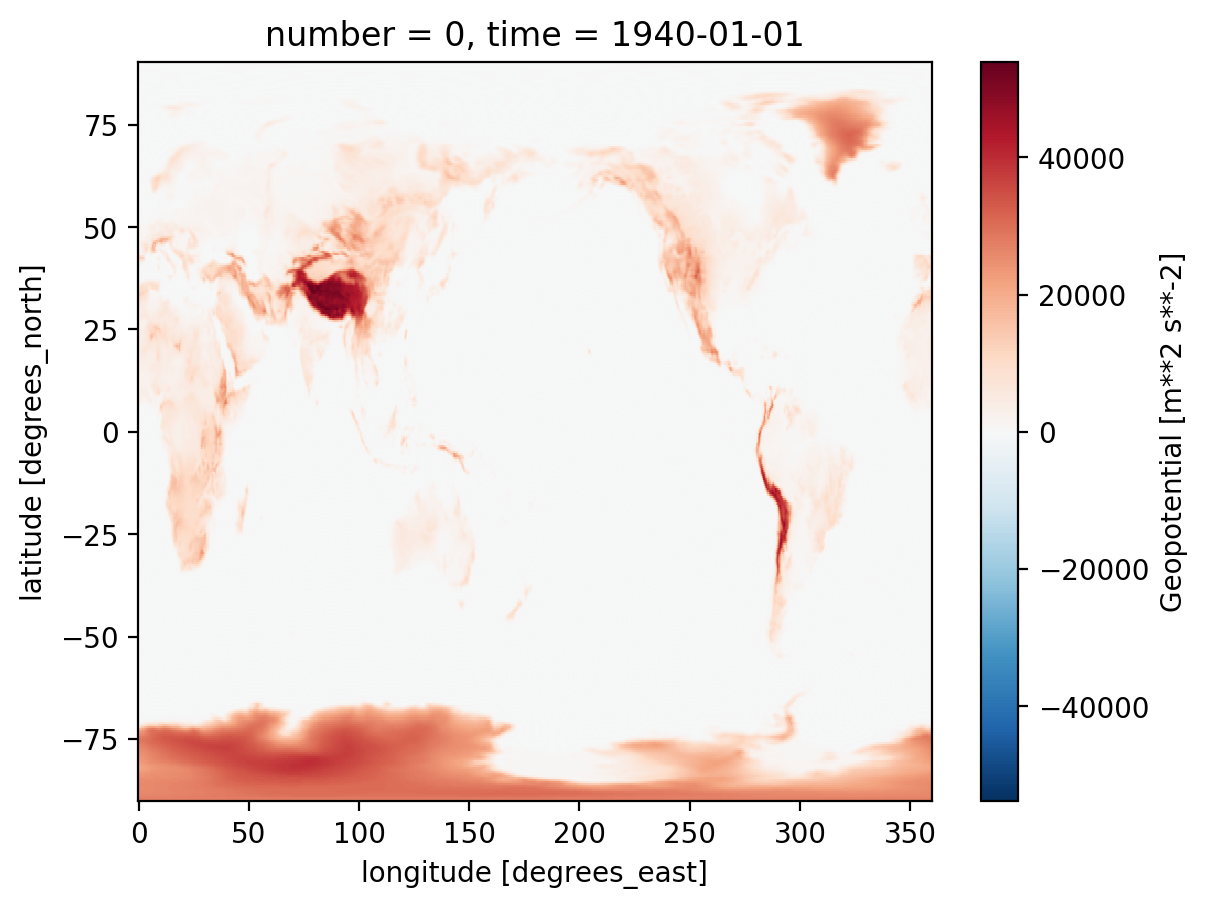

In [6]:
orog_ERA5.z.isel(time=0, number=0).plot()

In [7]:
temp_CM4 = temperature_pi_CM4.temp
temp_ESM4 = temperature_pi_ESM4.temp
temp_ERA5=observational_temp.t2m.mean('number')


In [8]:
temp_ERA5

<xarray.DataArray 't2m' (time: 12, latitude: 361, longitude: 720)>
array([[[247.0395 , 247.0395 , 247.0395 , ..., 247.0395 , 247.0395 ,
         247.0395 ],
        [247.37752, 247.38078, 247.38371, ..., 247.36946, 247.3722 ,
         247.37512],
        [247.64507, 247.65141, 247.65726, ..., 247.62703, 247.63286,
         247.63838],
        ...,
        [244.69632, 244.691  , 244.68462, ..., 244.71504, 244.70901,
         244.70317],
        [244.55469, 244.5516 , 244.54887, ..., 244.56401, 244.56058,
         244.55782],
        [244.31929, 244.31929, 244.31929, ..., 244.31929, 244.31929,
         244.31929]],

       [[243.50806, 243.50806, 243.50806, ..., 243.50806, 243.50806,
         243.50806],
        [243.66013, 243.66133, 243.66287, ..., 243.65738, 243.65823,
         243.65945],
        [243.88521, 243.88867, 243.8918 , ..., 243.87851, 243.88094,
         243.88213],
...
        [236.56625, 236.5606 , 236.5563 , ..., 236.58398, 236.57918,
         236.57382],
        [236.6816 , 236.67949, 236.6771 , ..., 236.68948, 236.68657,
         236.68416],
        [236.66592, 236.66592, 236.66592, ..., 236.66592, 236.66592,
         236.66592]],

       [[248.00403, 248.00403, 248.00403, ..., 248.00403, 248.00403,
         248.00403],
        [248.14375, 248.14153, 248.1398 , ..., 248.15132, 248.1489 ,
         248.14648],
        [248.64433, 248.6395 , 248.63504, ..., 248.65857, 248.6536 ,
         248.6486 ],
        ...,
        [243.95053, 243.94385, 243.93575, ..., 243.97269, 243.96548,
         243.95845],
        [243.84175, 243.8383 , 243.83487, ..., 243.85275, 243.84915,
         243.8457 ],
        [243.72214, 243.72214, 243.72214, ..., 243.72214, 243.72214,
         243.72214]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.5 1.0 1.5 ... 358.0 358.5 359.0 359.5
  * latitude   (latitude) float32 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 1940-12-01

In [9]:
temp_seasonal_CM4 = temp_CM4.groupby('time.season').mean(dim='time')
temp_summer_CM4= temp_seasonal_CM4.sel(season= 'DJF')
temp_winter_CM4=temp_seasonal_CM4.sel(season='JJA')
temp_spring_CM4=temp_seasonal_CM4.sel(season='SON')
temp_fall_CM4=temp_seasonal_CM4.sel(season='MAM')

In [10]:
temp_seasonal_ESM4 = temp_ESM4.groupby('time.season').mean(dim='time')
temp_summer_ESM4= temp_seasonal_ESM4.sel(season= 'DJF')
temp_winter_ESM4=temp_seasonal_ESM4.sel(season='JJA')
temp_spring_ESM4=temp_seasonal_ESM4.sel(season='SON')
temp_fall_ESM4=temp_seasonal_ESM4.sel(season='MAM')

In [11]:
temp_seasonal_ERA5 = temp_ERA5.groupby('time.season').mean(dim='time')
temp_summer_ERA5= temp_seasonal_ERA5.sel(season= 'DJF')
temp_winter_ERA5=temp_seasonal_ERA5.sel(season='JJA')
temp_spring_ERA5=temp_seasonal_ERA5.sel(season='SON')
temp_fall_ERA5=temp_seasonal_ERA5.sel(season='MAM')

In [12]:
plateau_temp_total_CM4=(temp_CM4*(mask_CM4.plateau_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon').mean(dim='time')
ross_temp_total_CM4=(temp_CM4*(mask_CM4.ross_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon').mean(dim='time')
lowwest_temp_total_CM4=(temp_CM4*(mask_CM4.lowwest_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon').mean(dim='time')
loweast_temp_total_CM4=(temp_CM4*(mask_CM4.loweast_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon').mean(dim='time')
filchner_temp_total_CM4=(temp_CM4*(mask_CM4.filchner_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon').mean(dim='time')
peninsula_temp_total_CM4=(temp_CM4*(mask_CM4.peninsula_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon').mean(dim='time')

plateau_temp_total_ESM4=(temp_ESM4*(mask_ESM4.plateau_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon').mean(dim='time')
ross_temp_total_ESM4=(temp_ESM4*(mask_ESM4.ross_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon').mean(dim='time')
lowwest_temp_total_ESM4=(temp_ESM4*(mask_ESM4.lowwest_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon').mean(dim='time')
loweast_temp_total_ESM4=(temp_ESM4*(mask_ESM4.loweast_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon').mean(dim='time')
filchner_temp_total_ESM4=(temp_ESM4*(mask_ESM4.filchner_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon').mean(dim='time')
peninsula_temp_total_ESM4=(temp_ESM4*(mask_ESM4.peninsula_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon').mean(dim='time')

plateau_temp_total_ERA5=(temp_ERA5*(mask_ERA5.plateau_ERA5)).mean(dim='latitude').mean(dim='longitude').mean(dim='time')
ross_temp_total_ERA5=(temp_ERA5*(mask_ERA5.ross_ERA5)).mean(dim='latitude').mean(dim='longitude').mean(dim='time')
lowwest_temp_total_ERA5=(temp_ERA5*(mask_ERA5.lowwest_ERA5)).mean(dim='latitude').mean(dim='longitude').mean(dim='time')
loweast_temp_total_ERA5=(temp_ERA5*(mask_ERA5.loweast_ERA5)).mean(dim='latitude').mean(dim='longitude').mean(dim='time')
filchner_temp_total_ERA5=(temp_ERA5*(mask_ERA5.filchner_ERA5)).mean(dim='latitude').mean(dim='longitude').mean(dim='time')
peninsula_temp_total_ERA5=(temp_ERA5*(mask_ERA5.peninsula_ERA5)).mean(dim='latitude').mean(dim='longitude').mean(dim='time')


In [19]:
plateau_temp_summer_CM4=(temp_summer_CM4*(mask_CM4.plateau_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
ross_temp_summer_CM4=(temp_summer_CM4*(mask_CM4.ross_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
lowwest_temp_summer_CM4=(temp_summer_CM4*(mask_CM4.lowwest_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
loweast_temp_summer_CM4=(temp_summer_CM4*(mask_CM4.loweast_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
filchner_temp_summer_CM4=(temp_summer_CM4*(mask_CM4.filchner_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
peninsula_temp_summer_CM4=(temp_summer_CM4*(mask_CM4.peninsula_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')

plateau_temp_summer_ESM4=(temp_summer_ESM4*(mask_ESM4.plateau_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
ross_temp_summer_ESM4=(temp_summer_ESM4*(mask_ESM4.ross_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
lowwest_temp_summer_ESM4=(temp_summer_ESM4*(mask_ESM4.lowwest_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
loweast_temp_summer_ESM4=(temp_summer_ESM4*(mask_ESM4.loweast_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
filchner_temp_summer_ESM4=(temp_summer_ESM4*(mask_ESM4.filchner_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
peninsula_temp_summer_ESM4=(temp_summer_ESM4*(mask_ESM4.peninsula_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')

plateau_temp_summer_ERA5=(temp_summer_ERA5*(mask_ERA5.plateau_ERA5)).mean(dim='latitude').mean(dim='longitude')
ross_temp_summer_ERA5=(temp_summer_ERA5*(mask_ERA5.ross_ERA5)).mean(dim='latitude').mean(dim='longitude')
lowwest_temp_summer_ERA5=(temp_summer_ERA5*(mask_ERA5.lowwest_ERA5)).mean(dim='latitude').mean(dim='longitude')
loweast_temp_summer_ERA5=(temp_summer_ERA5*(mask_ERA5.loweast_ERA5)).mean(dim='latitude').mean(dim='longitude')
filchner_temp_summer_ERA5=(temp_summer_ERA5*(mask_ERA5.filchner_ERA5)).mean(dim='latitude').mean(dim='longitude')
peninsula_temp_summer_ERA5=(temp_summer_ERA5*(mask_ERA5.peninsula_ERA5)).mean(dim='latitude').mean(dim='longitude')

In [20]:
plateau_temp_winter_CM4=(temp_winter_CM4*(mask_CM4.plateau_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
ross_temp_winter_CM4=(temp_winter_CM4*(mask_CM4.ross_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
lowwest_temp_winter_CM4=(temp_winter_CM4*(mask_CM4.lowwest_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
loweast_temp_winter_CM4=(temp_winter_CM4*(mask_CM4.loweast_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
filchner_temp_winter_CM4=(temp_winter_CM4*(mask_CM4.filchner_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
peninsula_temp_winter_CM4=(temp_winter_CM4*(mask_CM4.peninsula_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')

plateau_temp_winter_ESM4=(temp_winter_ESM4*(mask_ESM4.plateau_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
ross_temp_winter_ESM4=(temp_winter_ESM4*(mask_ESM4.ross_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
lowwest_temp_winter_ESM4=(temp_winter_ESM4*(mask_ESM4.lowwest_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
loweast_temp_winter_ESM4=(temp_winter_ESM4*(mask_ESM4.loweast_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
filchner_temp_winter_ESM4=(temp_winter_ESM4*(mask_ESM4.filchner_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
peninsula_temp_winter_ESM4=(temp_winter_ESM4*(mask_ESM4.peninsula_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')

plateau_temp_winter_ERA5=(temp_winter_ERA5*(mask_ERA5.plateau_ERA5)).mean(dim='latitude').mean(dim='longitude')
ross_temp_winter_ERA5=(temp_winter_ERA5*(mask_ERA5.ross_ERA5)).mean(dim='latitude').mean(dim='longitude')
lowwest_temp_winter_ERA5=(temp_winter_ERA5*(mask_ERA5.lowwest_ERA5)).mean(dim='latitude').mean(dim='longitude')
loweast_temp_winter_ERA5=(temp_winter_ERA5*(mask_ERA5.loweast_ERA5)).mean(dim='latitude').mean(dim='longitude')
filchner_temp_winter_ERA5=(temp_winter_ERA5*(mask_ERA5.filchner_ERA5)).mean(dim='latitude').mean(dim='longitude')
peninsula_temp_winter_ERA5=(temp_winter_ERA5*(mask_ERA5.peninsula_ERA5)).mean(dim='latitude').mean(dim='longitude')

In [21]:
plateau_temp_fall_CM4=(temp_fall_CM4*(mask_CM4.plateau_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
ross_temp_fall_CM4=(temp_fall_CM4*(mask_CM4.ross_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
lowwest_temp_fall_CM4=(temp_fall_CM4*(mask_CM4.lowwest_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
loweast_temp_fall_CM4=(temp_fall_CM4*(mask_CM4.loweast_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
filchner_temp_fall_CM4=(temp_fall_CM4*(mask_CM4.filchner_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
peninsula_temp_fall_CM4=(temp_fall_CM4*(mask_CM4.peninsula_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')

plateau_temp_fall_ESM4=(temp_fall_ESM4*(mask_ESM4.plateau_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
ross_temp_fall_ESM4=(temp_fall_ESM4*(mask_ESM4.ross_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
lowwest_temp_fall_ESM4=(temp_fall_ESM4*(mask_ESM4.lowwest_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
loweast_temp_fall_ESM4=(temp_fall_ESM4*(mask_ESM4.loweast_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
filchner_temp_fall_ESM4=(temp_fall_ESM4*(mask_ESM4.filchner_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
peninsula_temp_fall_ESM4=(temp_fall_ESM4*(mask_ESM4.peninsula_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')

plateau_temp_fall_ERA5=(temp_fall_ERA5*(mask_ERA5.plateau_ERA5)).mean(dim='latitude').mean(dim='longitude')
ross_temp_fall_ERA5=(temp_fall_ERA5*(mask_ERA5.ross_ERA5)).mean(dim='latitude').mean(dim='longitude')
lowwest_temp_fall_ERA5=(temp_fall_ERA5*(mask_ERA5.lowwest_ERA5)).mean(dim='latitude').mean(dim='longitude')
loweast_temp_fall_ERA5=(temp_fall_ERA5*(mask_ERA5.loweast_ERA5)).mean(dim='latitude').mean(dim='longitude')
filchner_temp_fall_ERA5=(temp_fall_ERA5*(mask_ERA5.filchner_ERA5)).mean(dim='latitude').mean(dim='longitude')
peninsula_temp_fall_ERA5=(temp_fall_ERA5*(mask_ERA5.peninsula_ERA5)).mean(dim='latitude').mean(dim='longitude')

In [22]:
plateau_temp_spring_CM4=(temp_spring_CM4*(mask_CM4.plateau_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
ross_temp_spring_CM4=(temp_spring_CM4*(mask_CM4.ross_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
lowwest_temp_spring_CM4=(temp_spring_CM4*(mask_CM4.lowwest_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
loweast_temp_spring_CM4=(temp_spring_CM4*(mask_CM4.loweast_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
filchner_temp_spring_CM4=(temp_spring_CM4*(mask_CM4.filchner_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')
peninsula_temp_spring_CM4=(temp_spring_CM4*(mask_CM4.peninsula_CM4)).mean(dim='pfull').mean(dim='lat').mean(dim='lon')

plateau_temp_spring_ESM4=(temp_spring_ESM4*(mask_ESM4.plateau_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
ross_temp_spring_ESM4=(temp_spring_ESM4*(mask_ESM4.ross_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
lowwest_temp_spring_ESM4=(temp_spring_ESM4*(mask_ESM4.lowwest_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
loweast_temp_spring_ESM4=(temp_spring_ESM4*(mask_ESM4.loweast_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
filchner_temp_spring_ESM4=(temp_spring_ESM4*(mask_ESM4.filchner_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')
peninsula_temp_spring_ESM4=(temp_spring_ESM4*(mask_ESM4.peninsula_ESM4)).mean(dim='level').mean(dim='lat').mean(dim='lon')

plateau_temp_spring_ERA5=(temp_spring_ERA5*(mask_ERA5.plateau_ERA5)).mean(dim='latitude').mean(dim='longitude')
ross_temp_spring_ERA5=(temp_spring_ERA5*(mask_ERA5.ross_ERA5)).mean(dim='latitude').mean(dim='longitude')
lowwest_temp_spring_ERA5=(temp_spring_ERA5*(mask_ERA5.lowwest_ERA5)).mean(dim='latitude').mean(dim='longitude')
loweast_temp_spring_ERA5=(temp_spring_ERA5*(mask_ERA5.loweast_ERA5)).mean(dim='latitude').mean(dim='longitude')
filchner_temp_spring_ERA5=(temp_spring_ERA5*(mask_ERA5.filchner_ERA5)).mean(dim='latitude').mean(dim='longitude')
peninsula_temp_spring_ERA5=(temp_spring_ERA5*(mask_ERA5.peninsula_ERA5)).mean(dim='latitude').mean(dim='longitude')

In [18]:
plat_value_CM4_summer=print(plateau_temp_summer_CM4.values)
ross_value_CM4_summer= print(ross_temp_summer_CM4.values)
west_value_CM4_summer=print(lowwest_temp_summer_CM4.values)
east_value_CM4_summer=print(loweast_temp_summer_CM4.values)
filch_value_CM4_summer=print(filchner_temp_summer_CM4.values)
pen_value_CM4_summer=print(peninsula_temp_summer_CM4.values)

223.82227
233.96466
230.10686
233.02289
233.01022
238.5868


In [19]:
plat_value_ESM4_summer=print(plateau_temp_summer_ESM4.values)
ross_value_ESM4_summer= print(ross_temp_summer_ESM4.values)
west_value_ESM4_summer=print(lowwest_temp_summer_ESM4.values)
east_value_ESM4_summer=print(loweast_temp_summer_ESM4.values)
filch_value_ESM4_summer=print(filchner_temp_summer_ESM4.values)
pen_value_ESM4_summer=print(peninsula_temp_summer_ESM4.values)

227.58438
232.59732
230.62338
233.04433
232.42015
235.1494


In [42]:
plat_value_ERA5_summer=print(plateau_temp_summer_ERA5.values)
ross_value_ERA5_summer= print(ross_temp_summer_ERA5.values)
west_value_ERA5_summer=print(lowwest_temp_summer_ERA5.values)
east_value_ERA5_summer=print(loweast_temp_summer_ERA5.values)
filch_value_ERA5_summer=print(filchner_temp_summer_ERA5.values)
pen_value_ERA5_summer=print(peninsula_temp_summer_ERA5.values)

229.06377
247.86156
244.56761
246.1903
248.95052
262.36325


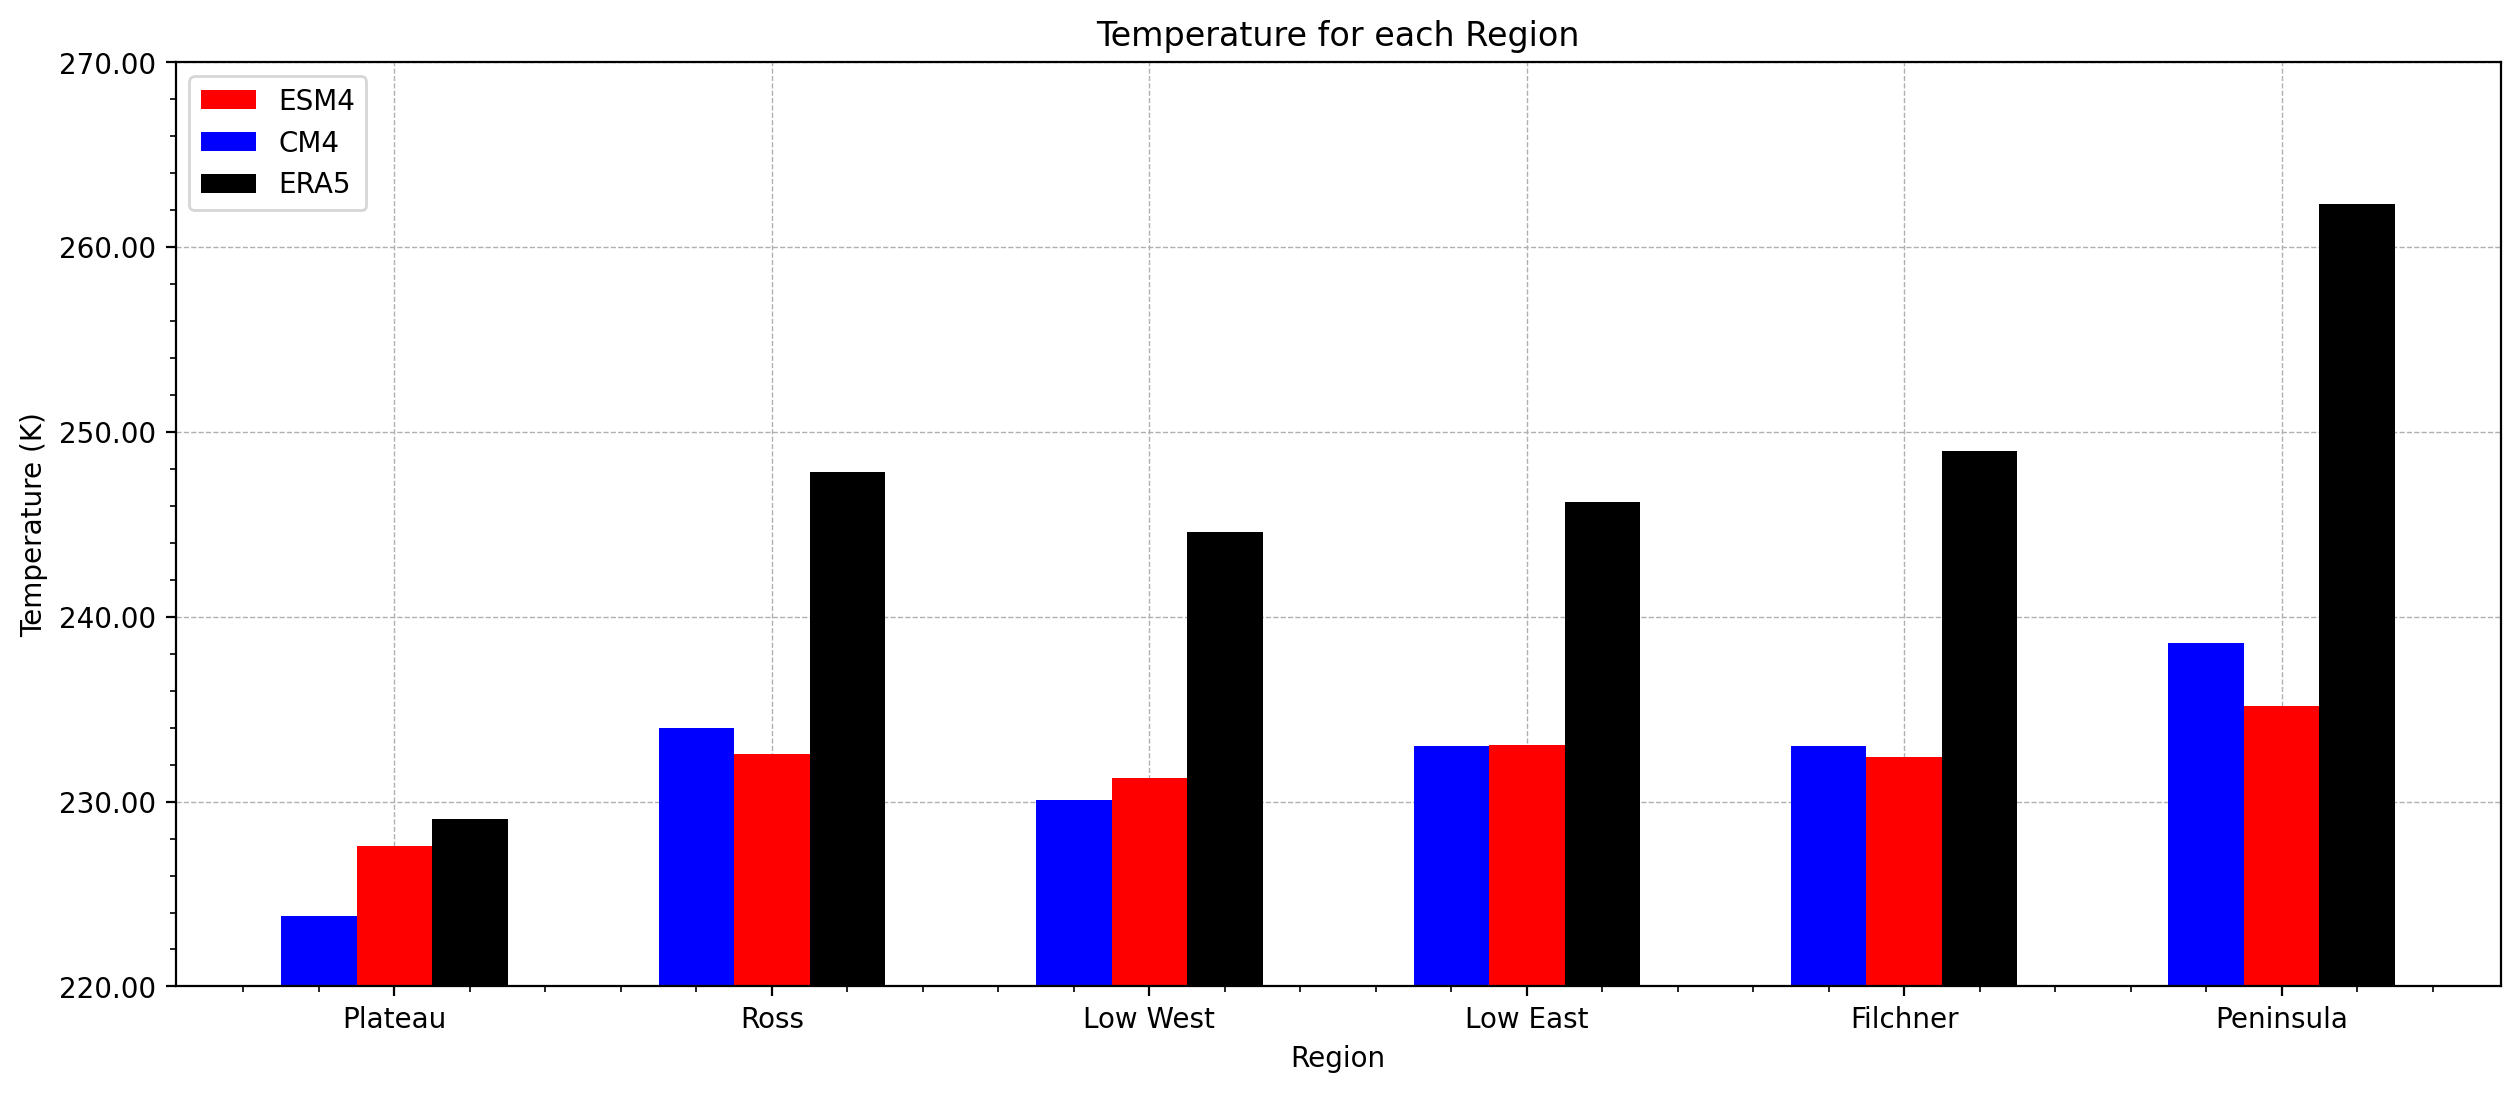

In [59]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4_total = [223.82227,
233.96466,
230.10686,
233.02289,
233.01022,
238.5868] 
ESM4_total = [227.58438,
232.59732,
231.27171,
233.04433,
232.42015,
235.1494] 
ERA5_total=[
229.06377,
247.86156,
244.56761,
246.1903,
248.95052,
262.36325 
]
X_axis = np.arange(len(X)) 
ax.grid(linewidth=0.5, linestyle= '--')
ax.set_axisbelow(True)
plt.bar(X_axis, ESM4_total, 0.2, label = 'ESM4', color='r') 
plt.bar(X_axis - 0.2, CM4_total, 0.2, label = 'CM4', color= 'blue') 
plt.bar(X_axis + 0.2, ERA5_total, 0.2, label= 'ERA5', color= 'k')
  
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Temperature (K)") 
plt.title("Temperature for each Region") 
plt.legend() 
plt.ylim(220,270)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.minorticks_on()
plt.show() 








In [27]:
plat_value_CM4_summer=print(plateau_temp_summer_CM4.values)
ross_value_CM4_summer= print(ross_temp_summer_CM4.values)
west_value_CM4_summer=print(lowwest_temp_summer_CM4.values)
east_value_CM4_summer=print(loweast_temp_summer_CM4.values)
filch_value_CM4_summer=print(filchner_temp_summer_CM4.values)
pen_value_CM4_summer=print(peninsula_temp_summer_CM4.values)

237.9152
247.34052
243.50017
243.92659
246.79234
248.6589


In [28]:
plat_value_ESM4_summer=print(plateau_temp_summer_ESM4.values)
ross_value_ESM4_summer= print(ross_temp_summer_ESM4.values)
west_value_ESM4_summer=print(lowwest_temp_summer_ESM4.values)
east_value_ESM4_summer=print(loweast_temp_summer_ESM4.values)
filch_value_ESM4_summer=print(filchner_temp_summer_ESM4.values)
pen_value_ESM4_summer=print(peninsula_temp_summer_ESM4.values)

243.57416
247.21832
245.49818
245.40067
246.96098
247.35742


In [23]:
plat_value_ERA5_summer=print(plateau_temp_summer_ERA5.values)
ross_value_ERA5_summer= print(ross_temp_summer_ERA5.values)
west_value_ERA5_summer=print(lowwest_temp_summer_ERA5.values)
east_value_ERA5_summer=print(loweast_temp_summer_ERA5.values)
filch_value_ERA5_summer=print(filchner_temp_summer_ERA5.values)
pen_value_ERA5_summer=print(peninsula_temp_summer_ERA5.values)

241.7662
261.15756
254.845
256.08813
262.03323
268.92407


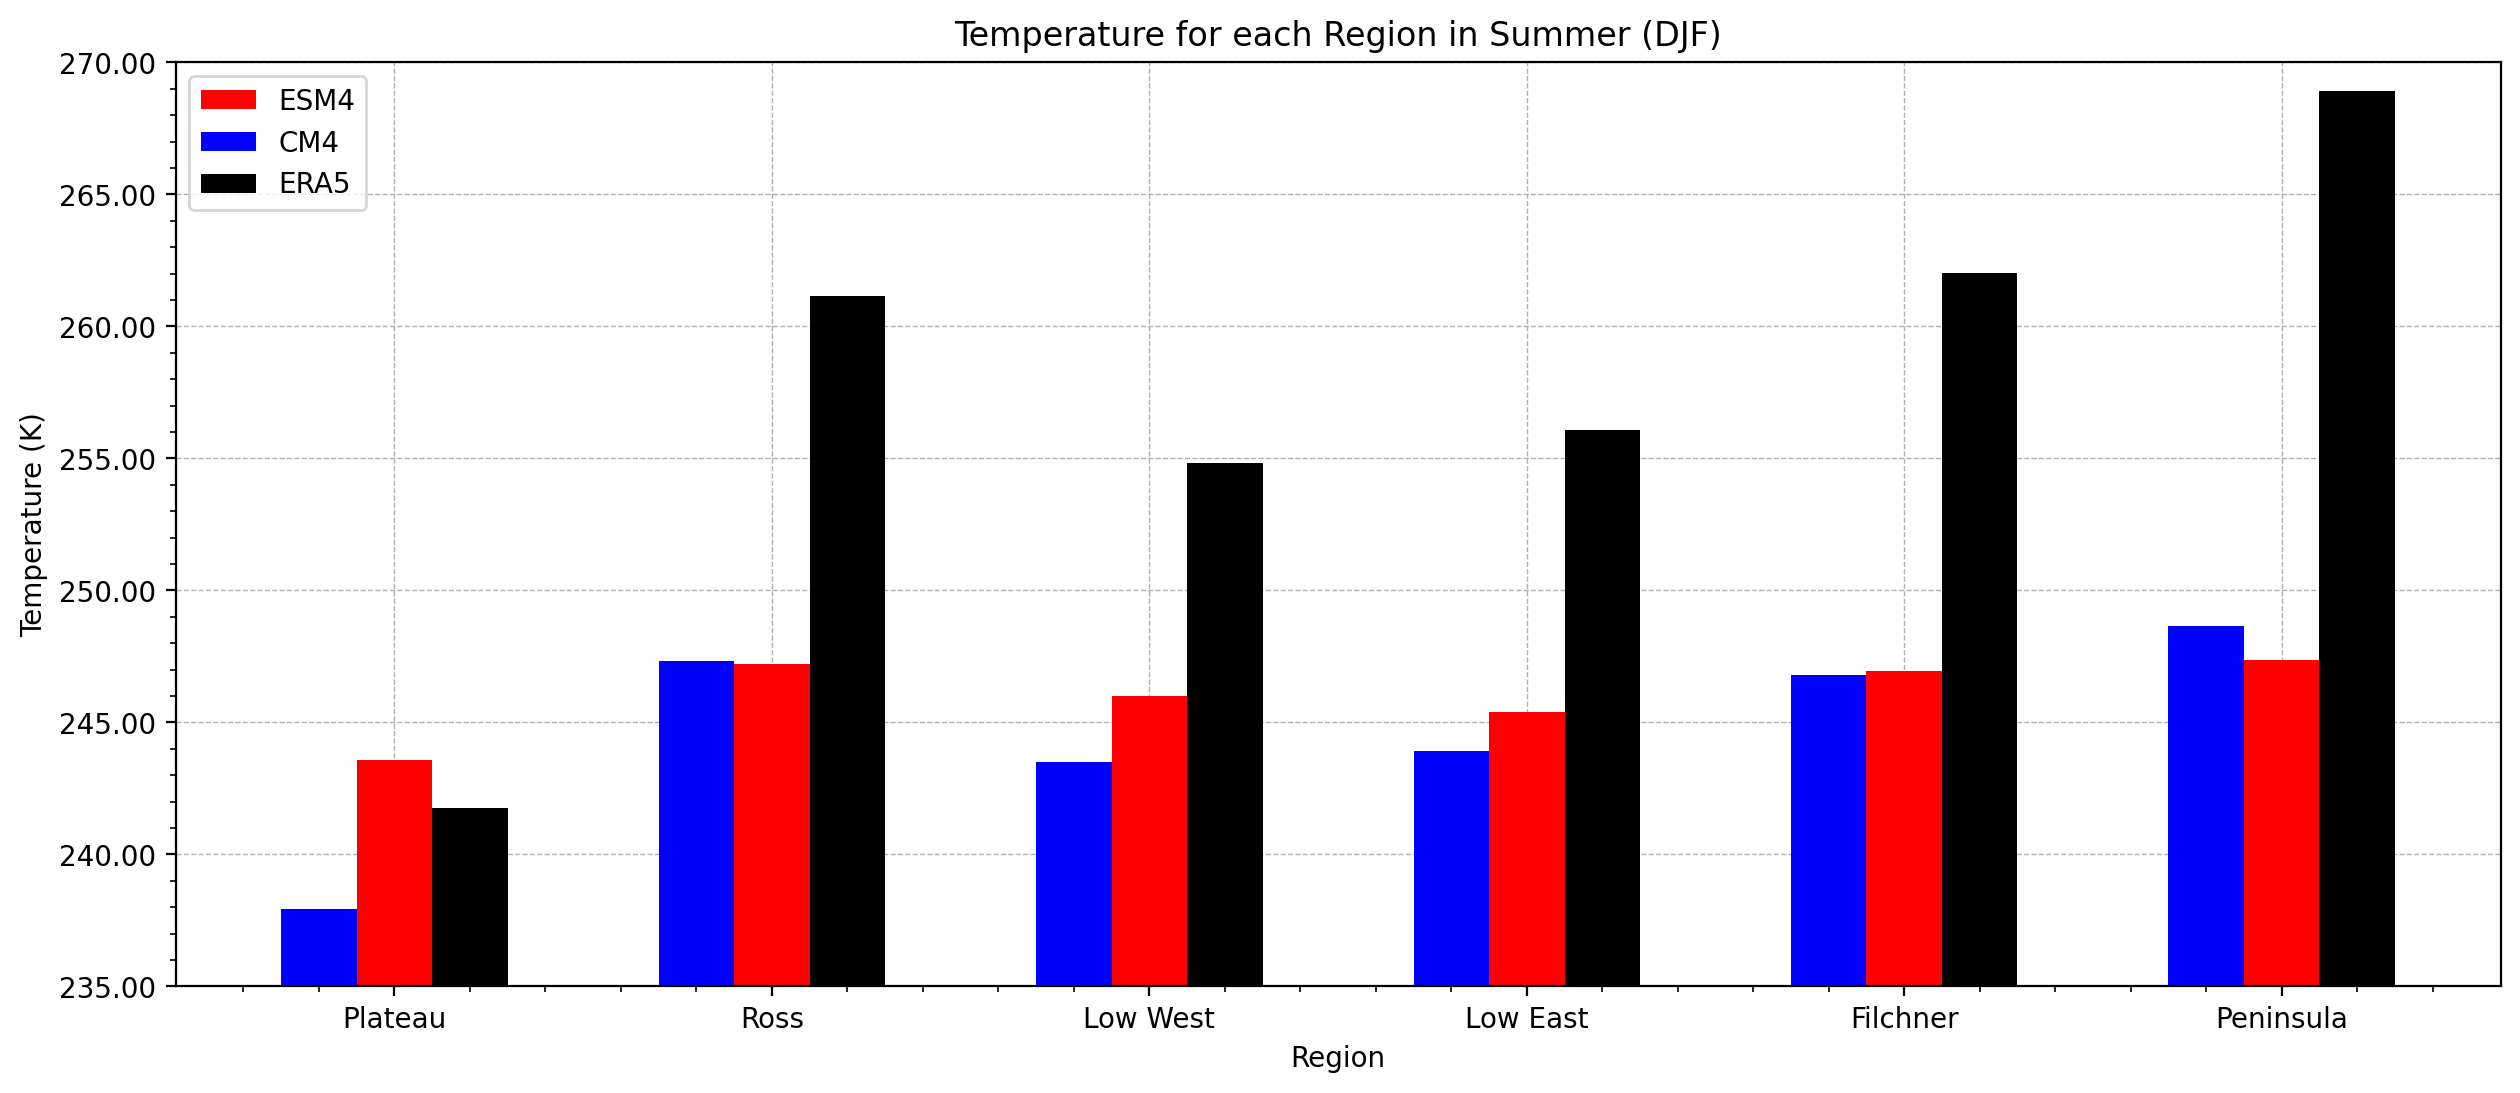

In [60]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4_summer = [237.9152,
247.34052,
243.50017,
243.92659,
246.79234,
248.6589] 
ESM4_summer = [243.57416,
247.21832,
245.98804,
245.40067,
246.96098,
247.35742] 

ERA5_summer=[241.7662,
261.15756,
254.845,
256.08813,
262.03323,
268.92407
     ]
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, ESM4_summer, 0.2, label = 'ESM4', color='r') 
plt.bar(X_axis - 0.2, CM4_summer, 0.2, label = 'CM4', color= 'blue') 
plt.bar(X_axis + 0.2, ERA5_summer, 0.2, label= 'ERA5', color= 'k')
ax.grid(linewidth=0.5, linestyle= '--')
ax.set_axisbelow(True)
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Temperature (K)") 
plt.title("Temperature for each Region in Summer (DJF)") 
plt.legend() 
plt.ylim(235,270)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.minorticks_on()
plt.show() 








In [30]:
plat_value_CM4_winter=print(plateau_temp_winter_CM4.values)
ross_value_CM4_winter= print(ross_temp_winter_CM4.values)
west_value_CM4_winter=print(lowwest_temp_winter_CM4.values)
east_value_CM4_winter=print(loweast_temp_winter_CM4.values)
filch_value_CM4_winter=print(filchner_temp_winter_CM4.values)
pen_value_CM4_winter=print(peninsula_temp_winter_CM4.values)

211.0074
221.2857
217.81888
222.40872
220.90349
228.88927


In [31]:
plat_value_ESM4_winter=print(plateau_temp_winter_ESM4.values)
ross_value_ESM4_winter= print(ross_temp_winter_ESM4.values)
west_value_ESM4_winterr=print(lowwest_temp_winter_ESM4.values)
east_value_ESM4_winter=print(loweast_temp_winter_ESM4.values)
filch_value_ESM4_winter=print(filchner_temp_winter_ESM4.values)
pen_value_ESM4_winter=print(peninsula_temp_winter_ESM4.values)

211.80536
219.6623
216.52388
221.16179
219.70515
225.01628


In [28]:
plat_value_ERA5_winter=print(plateau_temp_winter_ERA5.values)
ross_value_ERA5_winter= print(ross_temp_winter_ERA5.values)
west_value_ERA5_winterr=print(lowwest_temp_winter_ERA5.values)
east_value_ERA5_winter=print(loweast_temp_winter_ERA5.values)
filch_value_ERA5_winter=print(filchner_temp_winter_ERA5.values)
pen_value_ERA5_winter=print(peninsula_temp_winter_ERA5.values)

220.32777
239.59703
237.74261
239.27112
239.46196
257.21564


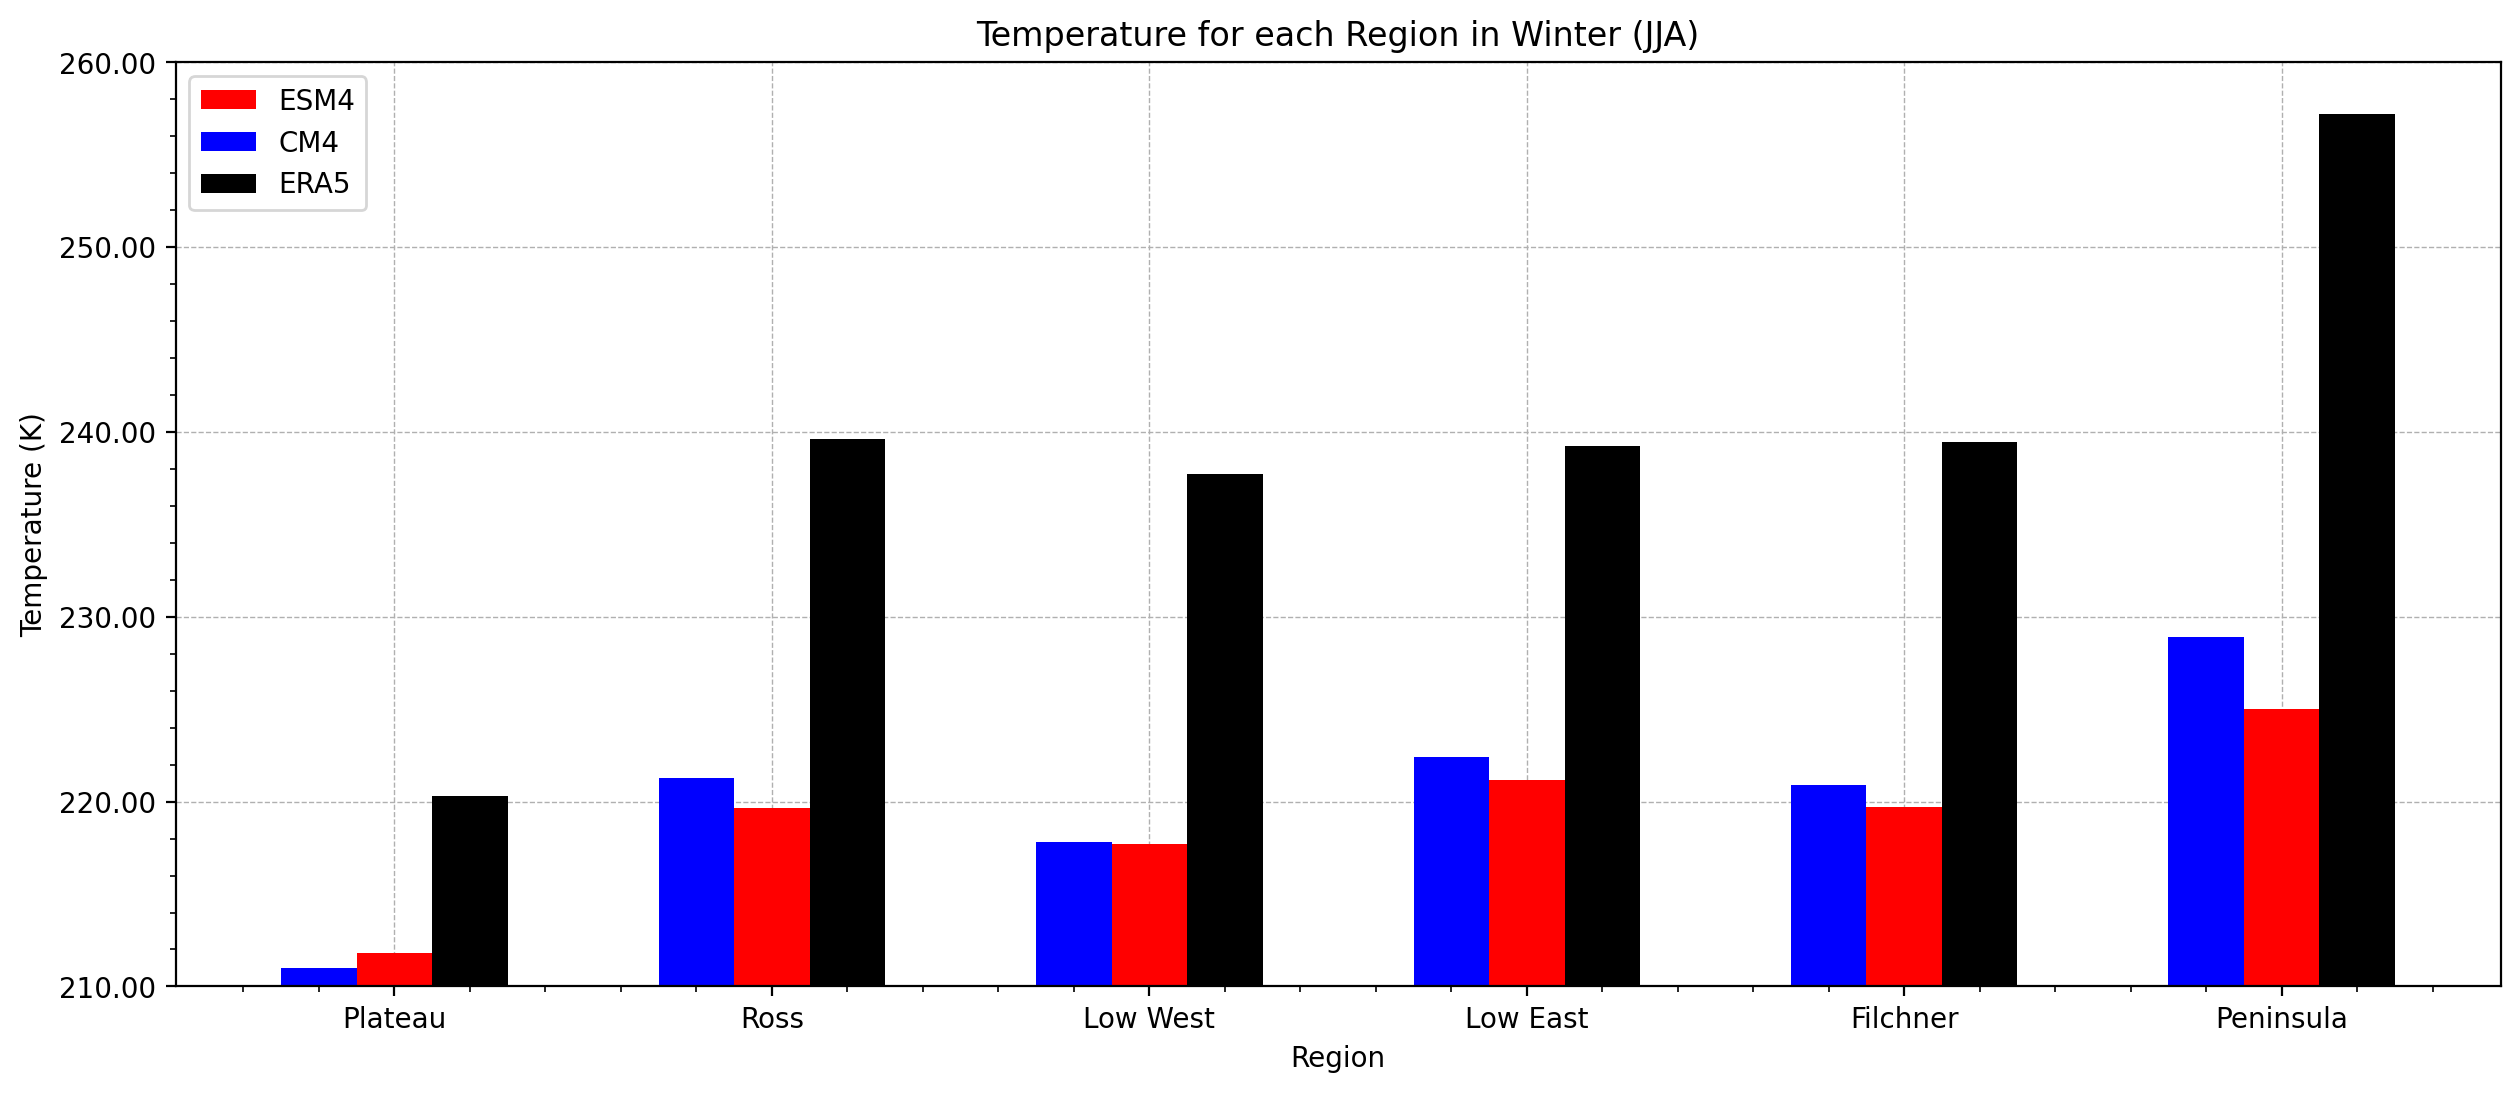

In [61]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4_winter = [211.0074,
221.2857,
217.81888,
222.40872,
220.90349,
228.88927
] 
ESM4_winter = [211.80536,
219.6623,
217.68489,
221.16179,
219.70515,
225.01628] 

ERA5_winter=[220.32777,
239.59703,
237.74261,
239.27112,
239.46196,
257.21564]

X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, ESM4_winter, 0.2, label = 'ESM4', color='r') 
plt.bar(X_axis - 0.2, CM4_winter, 0.2, label = 'CM4', color= 'blue') 
plt.bar(X_axis + 0.2, ERA5_winter, 0.2, label= 'ERA5', color= 'k')
ax.grid(linewidth=0.5, linestyle= '--')
ax.set_axisbelow(True)
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Temperature (K)") 
plt.title("Temperature for each Region in Winter (JJA)") 
plt.legend() 
plt.ylim(210,260)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.minorticks_on()
plt.show() 








In [33]:
plat_value_CM4_fall=print(plateau_temp_fall_CM4.values)
ross_value_CM4_fall= print(ross_temp_fall_CM4.values)
west_value_CM4_fall=print(lowwest_temp_fall_CM4.values)
east_value_CM4_fall=print(loweast_temp_fall_CM4.values)
filch_value_CM4_fall=print(filchner_temp_fall_CM4.values)
pen_value_CM4_fall=print(peninsula_temp_fall_CM4.values)

223.2136
233.22324
229.8781
232.38487
232.41486
238.96733


In [34]:
plat_value_ESM4_fall=print(plateau_temp_fall_ESM4.values)
ross_value_ESM4_fall= print(ross_temp_fall_ESM4.values)
west_value_ESM4_fall=print(lowwest_temp_fall_ESM4.values)
east_value_ESM4_fall=print(loweast_temp_fall_ESM4.values)
filch_value_ESM4_fall=print(filchner_temp_fall_ESM4.values)
pen_value_ESM4_fall=print(peninsula_temp_fall_ESM4.values)

224.55159
230.71411
228.16249
230.75299
230.25726
233.87589


In [33]:
plat_value_ERA5_fall=print(plateau_temp_fall_ERA5.values)
ross_value_ERA5_fall= print(ross_temp_fall_ERA5.values)
west_value_ERA5_fall=print(lowwest_temp_fall_ERA5.values)
east_value_ERA5_fall=print(loweast_temp_fall_ERA5.values)
filch_value_ERA5_fall=print(filchner_temp_fall_ERA5.values)
pen_value_ERA5_fall=print(peninsula_temp_fall_ERA5.values)

225.36215
243.0809
241.26602
244.16862
244.87935
260.49896


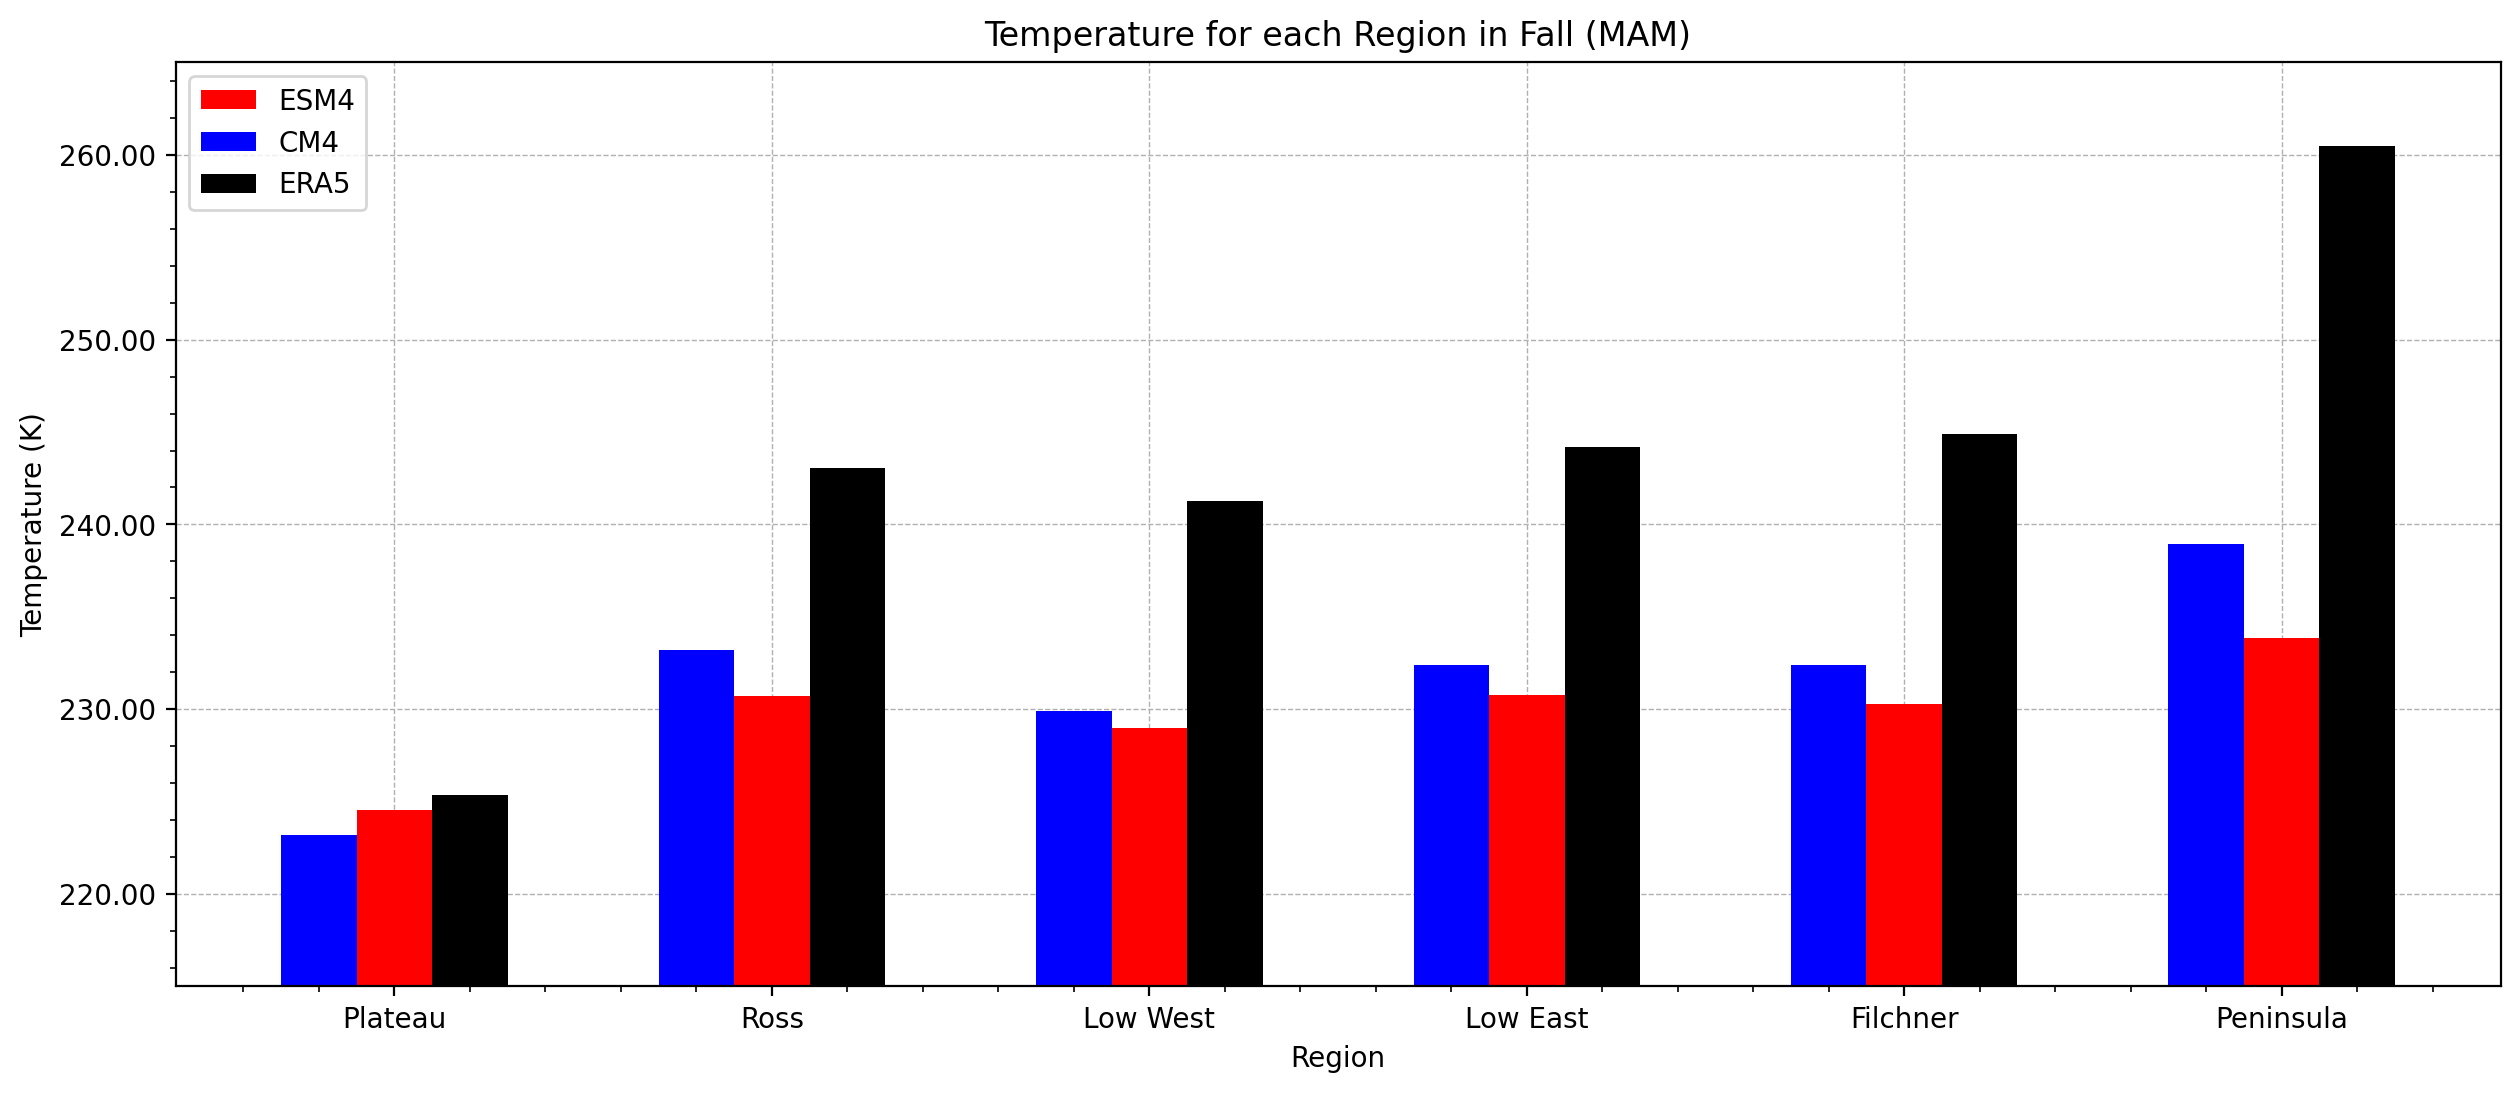

In [63]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4_fall = [223.2136,
233.22324,
229.8781,
232.38487,
232.41486,
238.96733
] 
ESM4_fall = [224.55159,
230.71411,
228.98859,
230.75299,
230.25726,
233.87589] 

ERA5_fall = [225.36215,
243.0809,
241.26602,
244.16862,
244.87935,
260.49896]

X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, ESM4_fall, 0.2, label = 'ESM4', color='r') 
plt.bar(X_axis - 0.2, CM4_fall, 0.2, label = 'CM4', color= 'blue') 
plt.bar(X_axis + 0.2, ERA5_fall, 0.2, label= 'ERA5', color= 'k')
ax.grid(linewidth=0.5, linestyle= '--')
ax.set_axisbelow(True)
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Temperature (K)") 
plt.title("Temperature for each Region in Fall (MAM)") 
plt.legend() 
plt.ylim(215,265)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.minorticks_on()
plt.show() 








In [36]:
plat_value_CM4_spring=print(plateau_temp_spring_CM4.values)
ross_value_CM4_spring= print(ross_temp_spring_CM4.values)
west_value_CM4_spring=print(lowwest_temp_spring_CM4.values)
east_value_CM4_spring=print(loweast_temp_spring_CM4.values)
filch_value_CM4_spring=print(filchner_temp_spring_CM4.values)
pen_value_CM4_spring=print(peninsula_temp_spring_CM4.values)

223.15291
234.00923
229.2303
233.37134
231.93024
237.83176


In [37]:
plat_value_ESM4_spring=print(plateau_temp_spring_ESM4.values)
ross_value_ESM4_spring= print(ross_temp_spring_ESM4.values)
west_value_ESM4_spring=print(lowwest_temp_spring_ESM4.values)
east_value_ESM4_spring=print(loweast_temp_spring_ESM4.values)
filch_value_ESM4_spring=print(filchner_temp_spring_ESM4.values)
pen_value_ESM4_spring=print(peninsula_temp_spring_ESM4.values)

230.66292
235.07298
232.92633
235.81972
234.6562
237.28159


In [38]:
plat_value_ERA5_spring=print(plateau_temp_spring_ERA5.values)
ross_value_ERA5_spring= print(ross_temp_spring_ERA5.values)
west_value_ERA5_spring=print(lowwest_temp_spring_ERA5.values)
east_value_ERA5_spring=print(loweast_temp_spring_ERA5.values)
filch_value_ERA5_spring=print(filchner_temp_spring_ERA5.values)
pen_value_ERA5_spring=print(peninsula_temp_spring_ERA5.values)

228.79887
247.61069
244.41684
245.2332
249.42749
262.81433


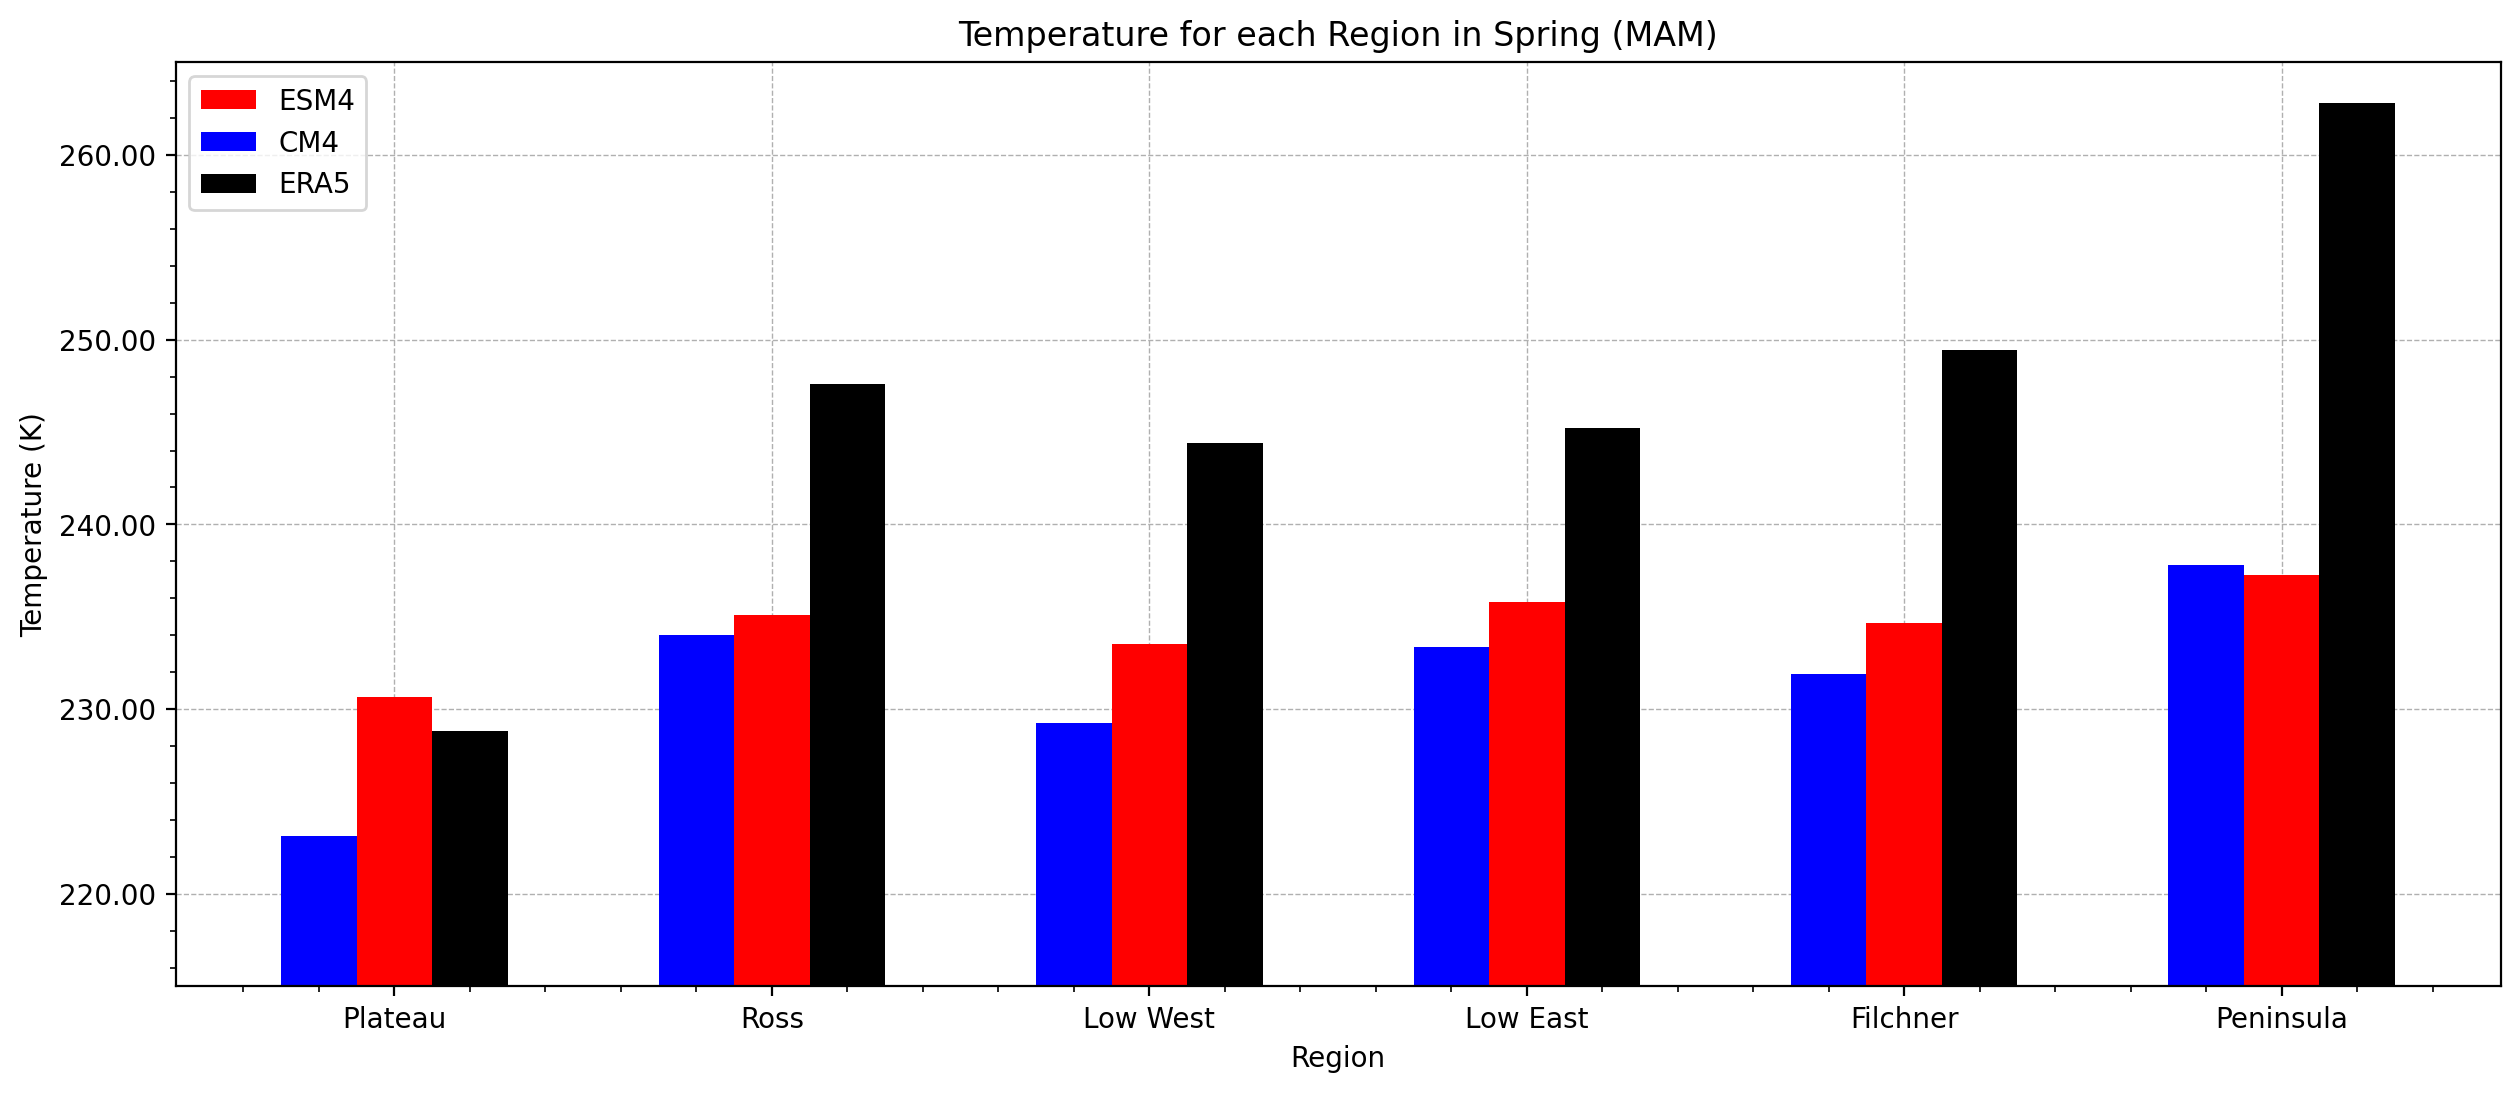

In [64]:

fig, ax= plt.subplots(figsize= (15,6))


X = ['Plateau','Ross','Low West','Low East', 'Filchner', 'Peninsula'] 
CM4_spring = [223.15291,
234.00923,
229.2303,
233.37134,
231.93024,
237.83176
] 
ESM4_spring = [230.66292,
235.07298,
233.54503,
235.81972,
234.6562,
237.28159] 

ERA5_spring=[228.79887,
247.61069,
244.41684,
245.2332,
249.42749,
262.81433]
  
X_axis = np.arange(len(X)) 
  
plt.bar(X_axis, ESM4_spring, 0.2, label = 'ESM4', color='r') 
plt.bar(X_axis - 0.2, CM4_spring, 0.2, label = 'CM4', color= 'blue') 
plt.bar(X_axis + 0.2, ERA5_spring, 0.2, label= 'ERA5', color= 'k')
ax.grid(linewidth=0.5, linestyle= '--')
ax.set_axisbelow(True)
plt.xticks(X_axis, X) 
plt.xlabel("Region") 
plt.ylabel("Temperature (K)") 
plt.title("Temperature for each Region in Spring (MAM)") 
plt.legend() 
plt.ylim(215,265)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.minorticks_on()
plt.show() 





